In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

# データセットの生成

In [2]:
# forgeデータセットの生成
X, y = mglearn.datasets.make_forge()

X.shape: (26, 2)


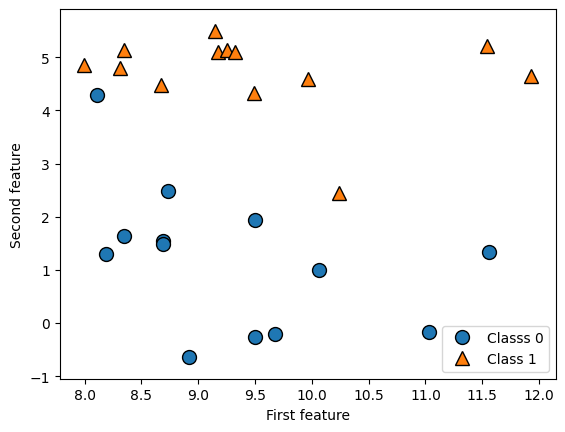

In [3]:
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Classs 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [4]:
# waveデータセットの生成
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

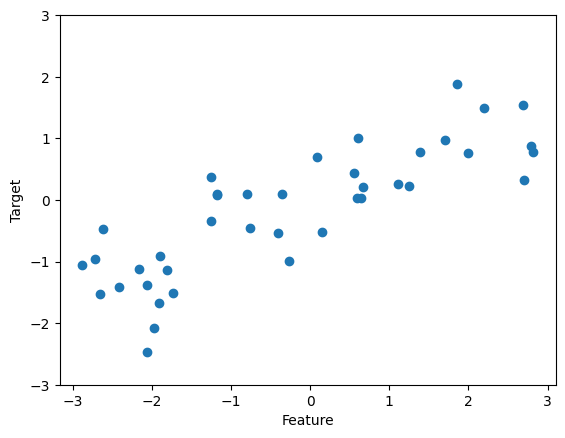

In [5]:
# データセットをプロット
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [6]:
# cancerデータセットの生成
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key(): \n{}".format(cancer.keys()))

cancer.key(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
# データセットの確認
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# boston_housingデータセットの生成
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [9]:
# boston_housingデータセット生成関数の定義
# https://stackoverflow.com/questions/57645829/why-am-i-getting-a-syntaxwarning-invalid-escape-sequence-s-warning
# https://wayama.io/article/library/sklearn/datasets/
# https://bbengfort.github.io/2016/04/bunch-data-management/
# https://www.kaggle.com/code/alexandrecazals/sklearn-boston-housing-dataset
def load_boston():
    import numpy as np
    import pandas as pd
    from sklearn.utils import Bunch
    
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    target_names = ['MEDV']
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    DESCR = """
        .. _boston_dataset:

        Boston house prices dataset
        ---------------------------
        
        **Data Set Characteristics:**  
        
            :Number of Instances: 506 
        
            :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
        
            :Attribute Information (in order):
                - CRIM     per capita crime rate by town
                - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
                - INDUS    proportion of non-retail business acres per town
                - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                - NOX      nitric oxides concentration (parts per 10 million)
                - RM       average number of rooms per dwelling
                - AGE      proportion of owner-occupied units built prior to 1940
                - DIS      weighted distances to five Boston employment centres
                - RAD      index of accessibility to radial highways
                - TAX      full-value property-tax rate per $10,000
                - PTRATIO  pupil-teacher ratio by town
                - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                - LSTAT    % lower status of the population
                - MEDV     Median value of owner-occupied homes in $1000's
        
            :Missing Attribute Values: None
        
            :Creator: Harrison, D. and Rubinfeld, D.L.
        
        This is a copy of UCI ML housing dataset.
        https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
        
        
        This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
        
        The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
        prices and the demand for clean air', J. Environ. Economics & Management,
        vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
        ...', Wiley, 1980.   N.B. Various transformations are used in the table on
        pages 244-261 of the latter.
        
        The Boston house-price data has been used in many machine learning papers that address regression
        problems.   
             
        .. topic:: References
        
           - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
           - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
    """
    return Bunch(data=data,
                 target=target,
                 frame=None,
                 target_names=target_names,
                 feature_names=feature_names,
                 DESCR=DESCR)

In [10]:
boston = load_boston()
# print(boston.keys())
# print(boston.data)
# print(boston.target)
# print(boston.frame)
# print(boston.target_names)
# print(boston.feature_names)
# print(boston.DESCR)
print(type(boston))
print("Data shape: {}".format(boston.data.shape))
print("Target shape: {}".format(boston.target.shape))

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = pd.DataFrame(data=boston.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (506, 13)
Target shape: (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
# print(california.keys())
# print(california.data)
# print(california.target)
# print(california.frame)
# print(california.target_names)
# print(california.feature_names)
# print(california.DESCR)
print(type(california))
print("Data shape: {}".format(california.data.shape))
print("Target shape: {}".format(california.target.shape))

df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedianHouseValue'] = pd.DataFrame(data=california.target)
df.shape
df.head()

<class 'sklearn.utils._bunch.Bunch'>
Data shape: (20640, 8)
Target shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
# 特徴量の交互作用も含めたデータの読み込み
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


# 線形モデル

## 線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


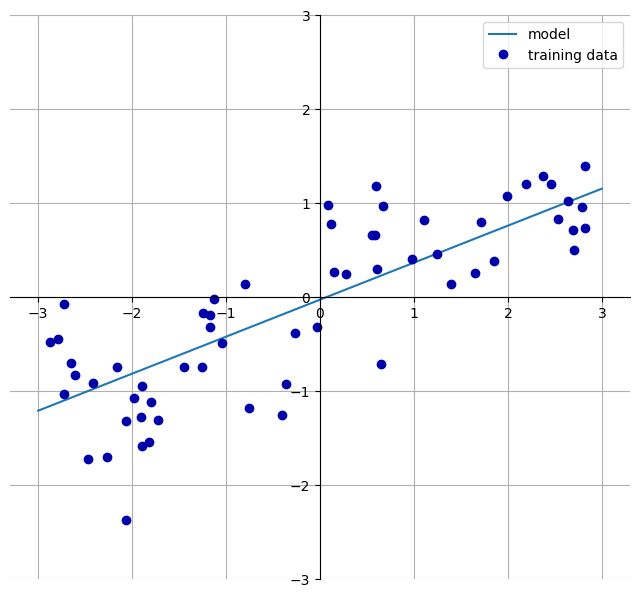

In [13]:
# waveデータセットの線型回帰
mglearn.plots.plot_linear_regression_wave()

### 線型回帰（通常最小二乗法）
- 線型回帰では、以下の式を最適化する係数$\boldsymbol{w}$と$b$を求める
- $\hat{y} = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b$
- ハイパーパラメータが存在しないため、モデルの複雑度を制御できない
- 以下の式で定義される$R^2$スコアでモデルの性能を評価する
    - https://atmarkit.itmedia.co.jp/ait/articles/2108/25/news033.html
    - $R^2 = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$
    - $R^2 = 1 - \frac{\sum_{i番目=1から}^{データ数までの総和}(観測値_{i番目} - 予測値_{i番目})^2}{\sum_{i番目=1から}^{データ数までの総和}(観測値_{i番目} - 観測値全体の平均値)^2}$
    - $R^2 = 1 - \frac{残差平方和}{全平方和}$

In [14]:
# waveデータの読み込みと分割
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# 訓練を行い、傾き（w）とオフセット（b）を確認する
lr = LinearRegression().fit(X_train, y_train)
print("Type of lr.coef_: {}".format(type(lr.coef_))) # 傾き/係数（coefficient）の型
print("Type of lr.intercept_: {}".format(type(lr.intercept_))) # オフセット/切片（intercept）の型
print("lr.coef_: {}".format(lr.coef_)) # 傾き/係数（coefficient）の値
print("lr.intercept_: {}".format(lr.intercept_)) # オフセット/切片（intercept）の値

Type of lr.coef_: <class 'numpy.ndarray'>
Type of lr.intercept_: <class 'numpy.float64'>
lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [16]:
# 性能（R2スコア）の確認
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [17]:
# boston_housingデータセットを用いた訓練
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [18]:
# 性能（R2スコア）の確認
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### リッジ（Ridge）回帰
- リッジ回帰では、$\boldsymbol{w}$の$L_2$ノルムに対してペナルティ（制約条件）を与えることで、できる限り係数$w[n]$の値を小さく保つ
- この制約条件は、モデルへの正則化（regularization）として機能する
- $L_2(\boldsymbol{w})$の値が小さいほど簡潔なモデルになる
- 制約の強さはalphaパラメータで制御できる
- 線型回帰はalpha=0におけるリッジ回帰になる

In [19]:
# boston_housingデータセットを用いた訓練
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# alphaが初期値（1.0）の場合の訓練
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [20]:
# alphaを大きくした場合の性能評価
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [21]:
# alphaを小さくした場合の性能評価
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


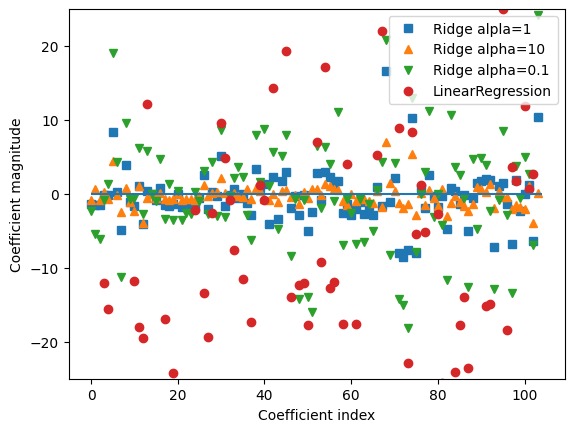

In [22]:
# alphaとcoef_の値の関係
plt.plot(ridge.coef_, 's', label="Ridge alpla=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

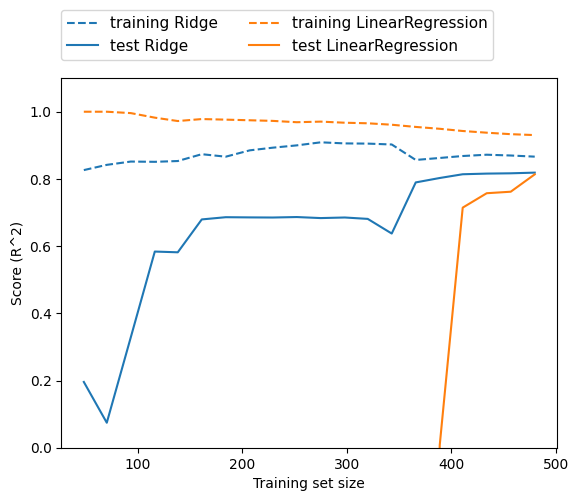

In [23]:
# モデルの性能とデータサイズの関係
mglearn.plots.plot_ridge_n_samples()

- 上の図から、十分な訓練データがある場合には、正則化はあまり重要ではないことがわかる
- データ量が多くなると、過剰適合の可能性が低くなる、もしくはデータを覚えることが難しくなる

### ラッソ（Lasso）回帰
- ラッソ回帰では、$\boldsymbol{w}$の$L_1$ノルムに対してペナルティ（制約条件）を与えることで、できる限り係数$w[n]$の値を小さく保つ
- この制約条件は、モデルへの正則化（regularization）として機能する
- $L_1(\boldsymbol{w})$の値が小さいほど簡潔なモデルになる
- 制約の強さはalphaパラメータで制御できる
- 線型回帰はalpha=0におけるLassoになる
- ラッソ回帰では、いくつかの係数が完全に0になり、これはモデルにおいていくつかの特徴量が完全に無視される（圧縮される）ことになる

In [24]:
# boston_housingデータセットを用いた訓練
from sklearn.linear_model import Lasso

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# alphaが初期値（1.0）の場合の訓練
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [25]:
# alphaを小さくした場合の性能評価
# "max_iter"の値を増やしている
# こうしておかないとモデルが、"max_iter"を増やすように警告を発する
# ConvergenceWarning: Objective did not converge. ...
# lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [26]:
# alphaをさらに小さくした場合の性能評価
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

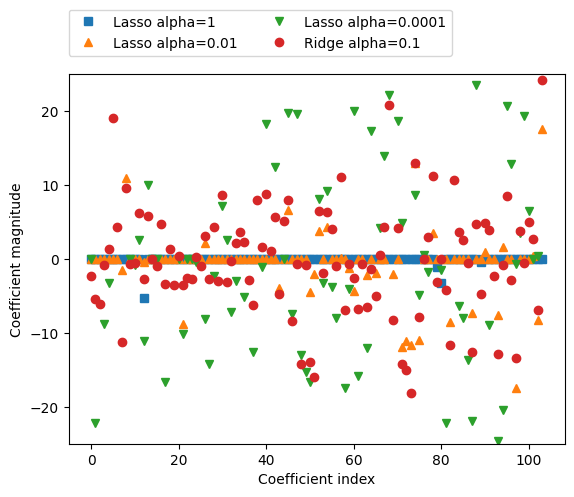

In [27]:
# alphaとcoef_の関係
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

### ElasticNet
- 参考：https://qiita.com/c60evaporator/items/d0356fca12b37a82fe57
- LassoとRidgeのペナルティを組み合わせた正則化を行う
- LassoとRidgeの2つのパラメータ（実際には正則化の強度alphaと、Lassoの影響度l1_ratio）を調整する必要がある

In [28]:
# boston_housingデータセットを用いた訓練
from sklearn.linear_model import ElasticNet

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# alpha, l1_ratioが初期値（1.0, 0.5）の場合の訓練
elastic = ElasticNet().fit(X_train, y_train)
print("Training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic.coef_ != 0)))

Training set score: 0.33
Test set score: 0.22
Number of features used: 38


In [29]:
# alphaを小さくした場合の性能評価
elastic_a001 = ElasticNet(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(elastic_a001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic_a001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic_a001.coef_ != 0)))

Training set score: 0.86
Test set score: 0.72
Number of features used: 84


In [30]:
# l1_ratioを小さくした場合の性能評価
elastic_r01 = ElasticNet(alpha=0.01, l1_ratio=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(elastic_r01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic_r01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic_r01.coef_ != 0)))

Training set score: 0.84
Test set score: 0.70
Number of features used: 98


In [31]:
# l1_ratioを大きくした場合の性能評価
elastic_r09 = ElasticNet(alpha=0.01, l1_ratio=0.9, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(elastic_r09.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic_r09.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic_r09.coef_ != 0)))

Training set score: 0.88
Test set score: 0.75
Number of features used: 51


Text(0, 0.5, 'Coefficient magnitude')

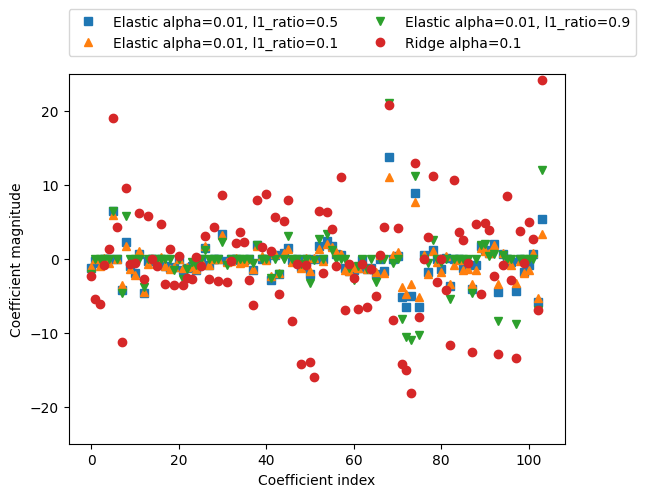

In [32]:
# l1_ratioとcoef_の関係
plt.plot(elastic_a001.coef_, 's', label="Elastic alpha=0.01, l1_ratio=0.5")
plt.plot(elastic_r01.coef_, '^', label="Elastic alpha=0.01, l1_ratio=0.1")
plt.plot(elastic_r09.coef_, 'v', label="Elastic alpha=0.01, l1_ratio=0.9")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## 線形モデルによるクラス分類

### 線形モデルによる２クラス分類
- 線形モデルでの2クラス分類では、以下の式を最適化する係数$\boldsymbol{w}$と$b$を求める
- $\hat{y} = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b > 0$
- $\hat{y}$は決定境界（超平面）となる
- 線形モデルを学習するアルゴリズムには以下の２点で区分される
    - 係数と切片の特定の組み合わせと訓練データへの適合度を測る尺度
    - 正規化を行うか。行うならどの方法を使うか
- 代表的なモデル
    - ロジスティック回帰（Logistic Regression）
    - 線形サポートベクターマシン（Linear Support Vector Machine）

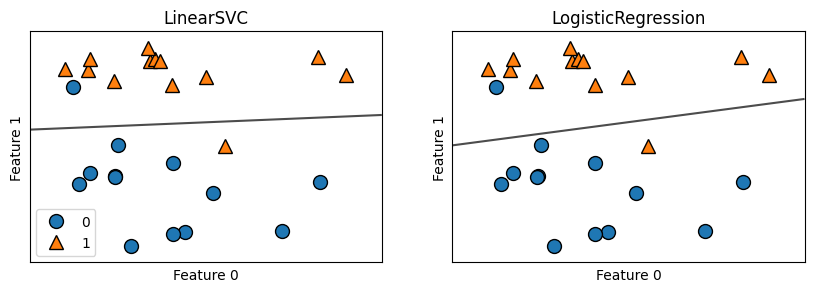

In [33]:
# ロジスティック回帰とサポートベクターマシンによる、forgeデータセットの分類
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC # SVC: Support Vector Classifier

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 警告回避のためLinearSVCの2つのパラメータ（dual, max_iter）を設定している
# LogsticRegressionの仕様変更により、solverの初期値がlbfgsに変更されている（ > ver.0.22）
# https://qiita.com/idontwannawork/items/86c5b833cdc0a4cf58b5
# 教科書通りの結果を得るためには、旧バージョンのliblinearを指定する
for model, ax in zip([LinearSVC(dual='auto', max_iter=100000), LogisticRegression(solver="liblinear")], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

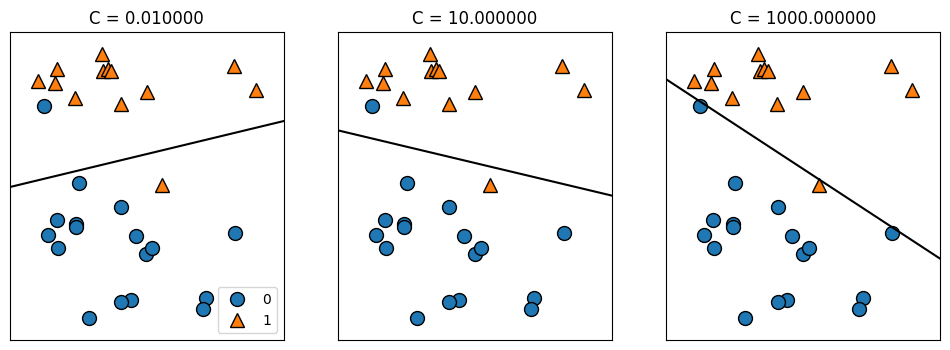

In [34]:
# LinearSVCにおいて、正則化の強度を決定するトレードオフパラメータCを変化させた場合
# Cが小さい場合は強い正則化、Cが大きい場合は弱い正則化になる
mglearn.plots.plot_linear_svc_regularization()

In [35]:
# cancerデータセットを用いたLogisticRegressionの性能評価
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(solver="liblinear").fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [36]:
# Cの値を大きくしてより複雑なモデルにする
logreg100 = LogisticRegression(C=100, solver="liblinear").fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.977
Test set score: 0.965


In [37]:
# Cの値を小さくしてより単純なモデルにする
logreg001 = LogisticRegression(C=0.01, solver="liblinear").fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


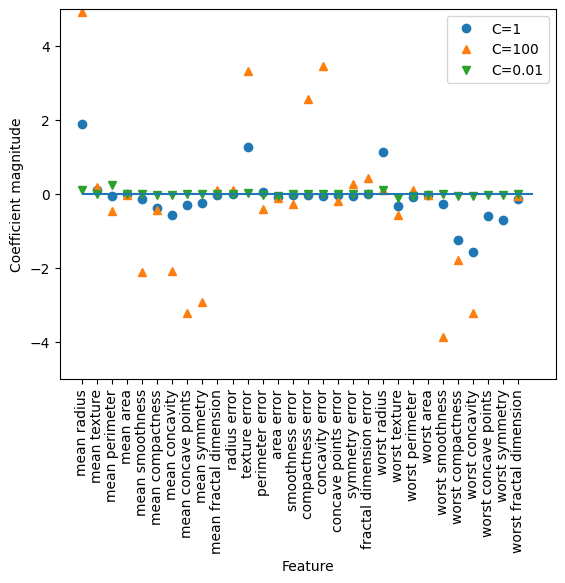

In [38]:
# Cの値と係数の関係
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Number of features used: 3
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Number of features used: 11
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98
Number of features used: 23


/usr/local/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


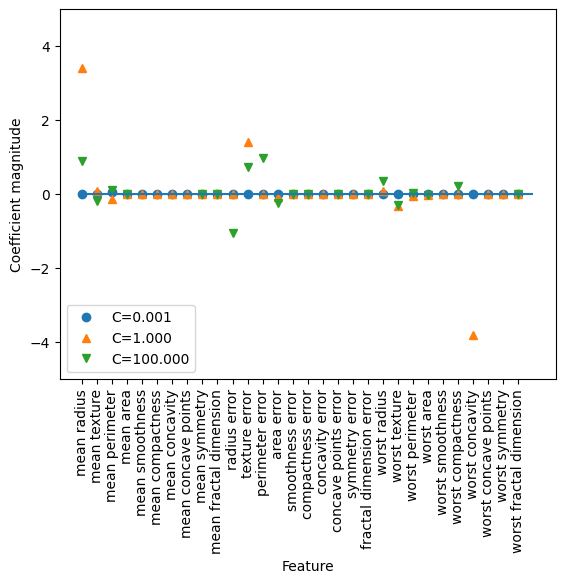

In [39]:
# ロジスティック回帰でL1正則化を用いる場合
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    print("Number of features used: {}".format(np.sum(lr_l1.coef_.T != 0)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 線形モデルによる多クラス分類
- 通常、２クラス分類アルゴリズムを多クラス分類に適用する場合には、１対他（one-vs.-rest）アプローチが取られる
- 多クラス分類では、すべての２クラス分類器をデータポイントに対して実行し、以下の式で一番高いスコアのクラス分類器の予測結果を採用する
- $\hat{y} = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b$
- ただし、多クラスロジスティック回帰の場合は、１対他のアプローチとは少し異なる

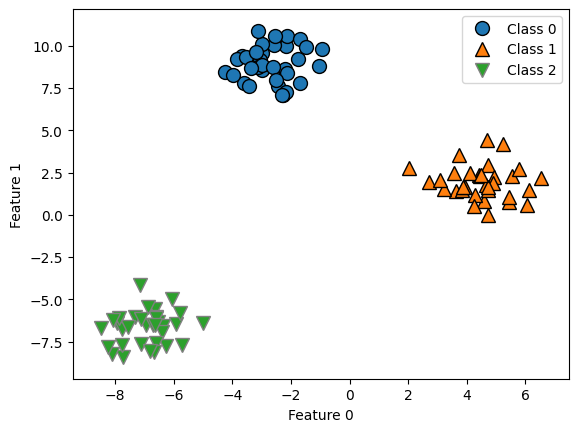

In [40]:
# データの読み込みと表示
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [41]:
# 線形SVMでの学習
linear_svm = LinearSVC(dual='auto').fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


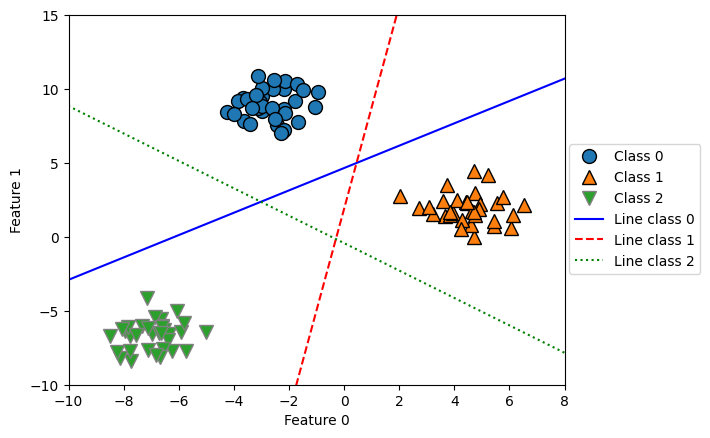

In [42]:
# 学習結果の可視化
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color, style in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g'], ['-', '--', ':']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, linestyle=style)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

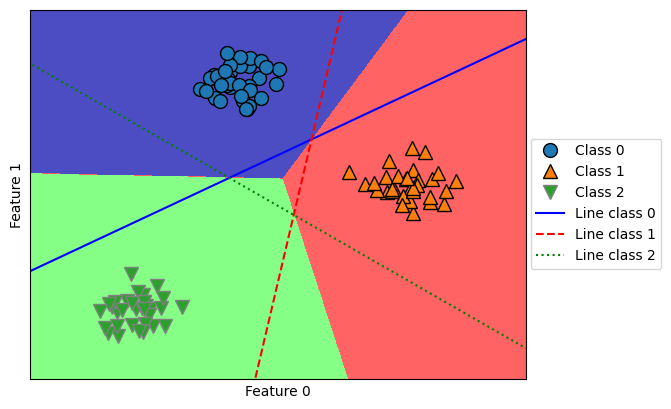

In [43]:
# すべての点に対する予測を描画する
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color, style, in zip(linear_svm.coef_, linear_svm.intercept_,
                                          ['b', 'r', 'g'], ['-', '--', ':']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, linestyle=style)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [44]:
# ロジスティック回帰による学習
logreg = LogisticRegression(solver="liblinear").fit(X, y)
print("Coefficient shape: ", logreg.coef_.shape)
print("Intercept shape: ", logreg.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


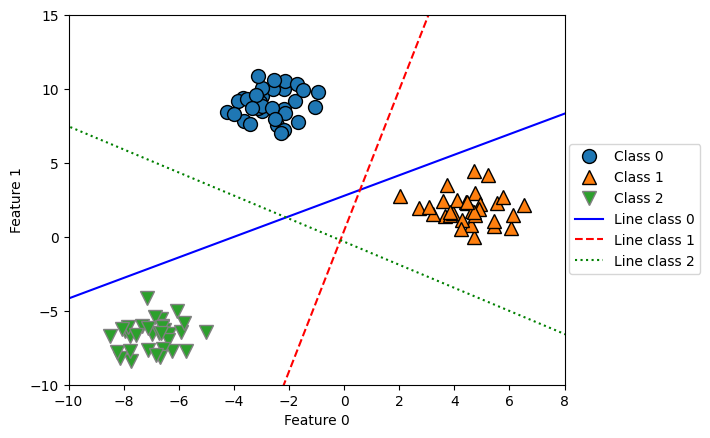

In [45]:
# 学習結果の可視化
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color, style in zip(logreg.coef_, logreg.intercept_,
                                  ['b', 'r', 'g'], ['-', '--', ':']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, linestyle=style)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

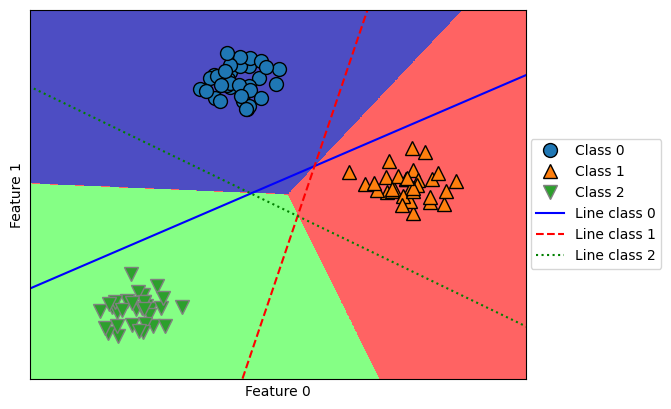

In [46]:
# すべての点に対する予測を描画する
mglearn.plots.plot_2d_classification(logreg, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color, style, in zip(logreg.coef_, logreg.intercept_,
                                          ['b', 'r', 'g'], ['-', '--', ':']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, linestyle=style)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 利点、欠点、パラメータ
- パラメータ
    - 回帰モデル
        - 正則化パラメータ alpha
    - 分類モデル
        - 正則化パラメータ C
    - 正則化手法
        - $L_1$正則化：一部の特徴量だけが重要な場合、モデルの解釈がしやすくなる
        - $L_2$正則化：デフォルトではこちらを使う
- 利点
    - 訓練も予測も高速
    - 非常に大きいデータセットにも適用できる
    - 疎なデータに対してもうまく機能する
    - 予測手法が比較的理解しやすい
    - 特徴量の数がサンプルの個数よりも多い時に性能を発揮する
- 欠点
    - 学習結果として得られた係数が、どうしてその値になっているのかは明らかでない
    - データセット中に強く相関した特徴量がある（特徴量が独立でない）場合は、係数の意味を理解することは難しい
    - 低次元空間では、他のモデルの方が良い汎化性能を示すことがある
- その他
    - 大きなデータセット（10万点以上）に対しては、LogisticRegressionとRidgeにsolver='sag'オプション（SAG: Stochastic Average Gradient）を指定すると高速な場合がある
    - 大きなデータセット（10万点以上）に対しては、SGDClassifierクラスとSGDRegressorクラス（SGD: Stochastic Gradient Descent）を使うとよい